In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load all the datasets
subscription_df = pd.read_csv(r'C:\Sky_Geni\subscription_information.csv')
payment_df = pd.read_csv(r'C:\Sky_Geni\payment_information.csv')
industry_df = pd.read_csv(r'C:\Sky_Geni\industry_client_details.csv')
financial_df = pd.read_csv(r'C:\Sky_Geni\finanical_information.csv')

### Display the first few rows of each dataframe to understand their structure

In [36]:
print("Subscription Information:")
print(subscription_df.head())

Subscription Information:
    client_id subscription_type  start_date    end_date  renewed
0  1131383004            Yearly  2020-11-11  2021-11-11    False
1  4309371709           Monthly  2021-05-24  2021-06-23     True
2  3183675157            Yearly  2021-12-25  2022-12-25     True
3  5371694837           Monthly  2020-03-14  2020-04-13     True
4  5157113076           Monthly  2019-11-07  2019-12-07    False


In [37]:
print("\nPayment Information:")
print(payment_df.head())


Payment Information:
    client_id payment_date  amount_paid payment_method
0  6292156167    9/16/2019        447.0  Bank Transfer
1  7462725203    5/21/2018        379.7  Bank Transfer
2  4698004907    9/11/2021        435.1          Check
3  3510240337    12/7/2020        413.1          Check
4  7501599785     3/4/2019         61.1  Bank Transfer


In [38]:
print("\nIndustry Client Details:")
print(industry_df.head())


Industry Client Details:
    client_id company_size         industry   location
0  4280387012        Large  Finance Lending     Mumbai
1  2095513148        Small  Finance Lending    Chennai
2  7225516707       Medium  Finance Lending  New Delhi
3  8093537819        Large      Block Chain     Mumbai
4  4387541014       Medium      Hyper Local   Banglore


In [39]:
print("\nFinancial Information:")
print(financial_df.head())


Financial Information:
   Unnamed: 0  start_date    end_date  inflation_rate  gdp_growth_rate
0           0  2018-01-01  2018-03-31            5.77             3.51
1           1  2018-04-01  2018-06-30            1.17             2.15
2           2  2018-07-01  2018-09-30            1.56             1.82
3           3  2018-10-01  2018-12-31            2.78             2.43
4           4  2019-01-01  2019-03-31            6.91             3.44


### Question 1: How many finance lending and blockchain clients does the organization have?


In [40]:
# Filter industry_df for Finance Lending and Block Chain clients
finance_blockchain_clients = industry_df[industry_df['industry'].isin(['Finance Lending', 'Block Chain'])]

In [41]:
# Count clients by industry
client_counts = finance_blockchain_clients['industry'].value_counts()

print("\nQuestion 1: Number of Finance Lending and Block Chain clients:")
print(client_counts)


Question 1: Number of Finance Lending and Block Chain clients:
Block Chain        25
Finance Lending    22
Name: industry, dtype: int64


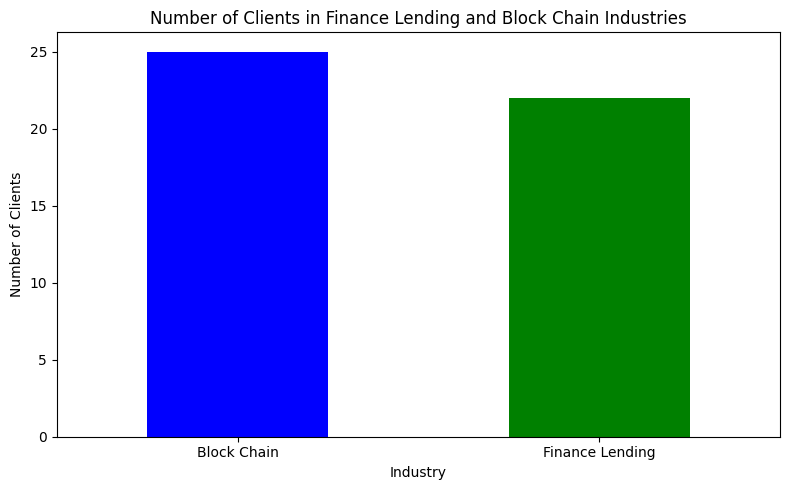

In [42]:
# Visualization
plt.figure(figsize=(8, 5))
client_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Clients in Finance Lending and Block Chain Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('q1_client_counts.png')
plt.show()

### Question 2: Which industry in the organization has the highest renewal rate?

In [43]:
# Merge subscription data with industry data
merged_df = pd.merge(subscription_df, industry_df, on='client_id', how='left')

In [44]:
# Calculate renewal rate by industry
renewal_rates = merged_df.groupby('industry')['renewed'].mean().sort_values(ascending=False)

print("\nQuestion 2: Renewal rates by industry:")
print(renewal_rates)


Question 2: Renewal rates by industry:
industry
Gaming             0.727273
AI                 0.636364
Finance Lending    0.545455
Hyper Local        0.450000
Block Chain        0.440000
Name: renewed, dtype: float64


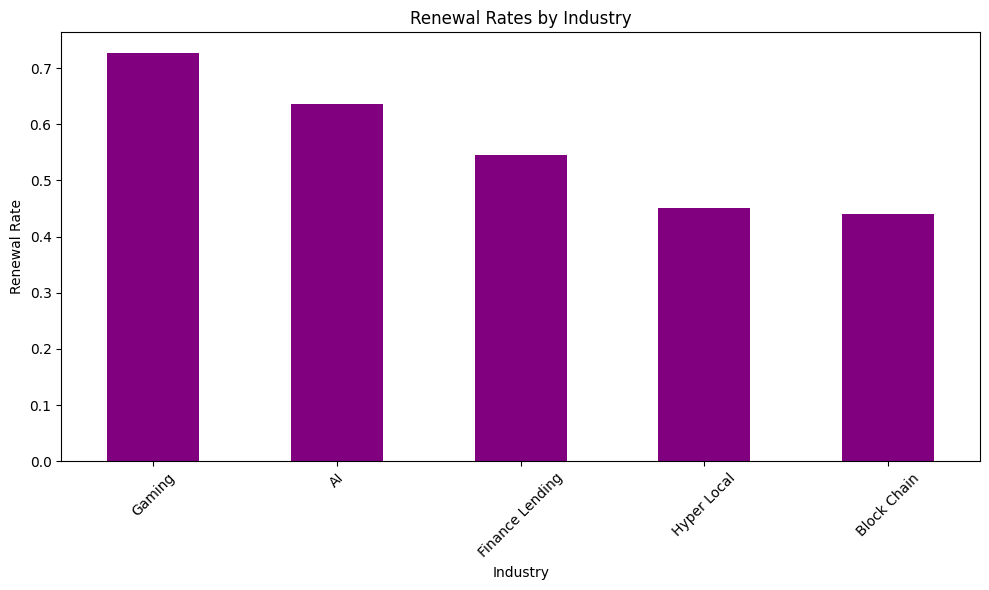

In [45]:
# Visualization
plt.figure(figsize=(10, 6))
renewal_rates.plot(kind='bar', color='purple')
plt.title('Renewal Rates by Industry')
plt.xlabel('Industry')
plt.ylabel('Renewal Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q2_renewal_rates.png')
plt.show()

### Question 3: What was the average inflation rate when their subscriptions were renewed?

In [46]:
# Convert date columns to datetime
subscription_df['start_date'] = pd.to_datetime(subscription_df['start_date'])
financial_df['start_date'] = pd.to_datetime(financial_df['start_date'])
financial_df['end_date'] = pd.to_datetime(financial_df['end_date'])

In [47]:
# Function to find inflation rate for a given date
def get_inflation_rate(date):
    date = pd.to_datetime(date)
    period = financial_df[(financial_df['start_date'] <= date) & (financial_df['end_date'] >= date)]
    if not period.empty:
        return period['inflation_rate'].values[0]
    return np.nan

In [48]:
# Apply function to get inflation rate at subscription start for renewed subscriptions
renewed_subscriptions = subscription_df[subscription_df['renewed'] == True]
renewed_subscriptions['inflation_rate'] = renewed_subscriptions['start_date'].apply(get_inflation_rate)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2152\3227568512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewed_subscriptions['inflation_rate'] = renewed_subscriptions['start_date'].apply(get_inflation_rate)


In [49]:
# Calculate average inflation rate
avg_inflation = renewed_subscriptions['inflation_rate'].mean()

print("\nQuestion 3: Average inflation rate during subscription renewals:")
print(f"{avg_inflation:.2f}%")


Question 3: Average inflation rate during subscription renewals:
4.44%


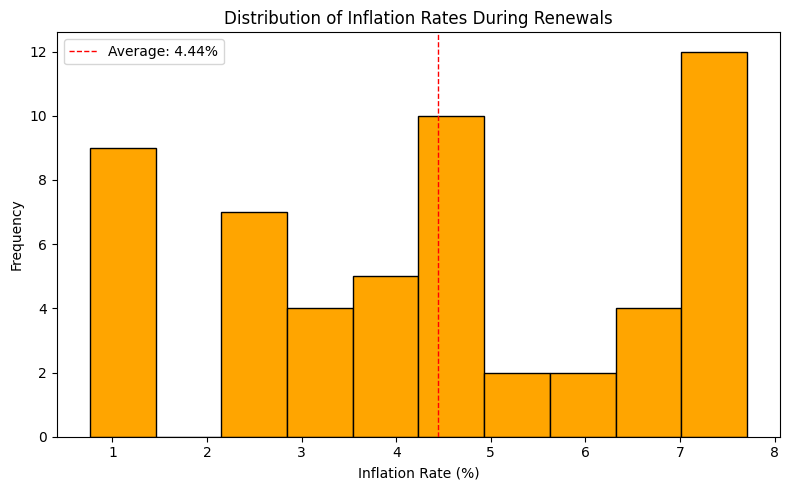

In [50]:
# Visualization
plt.figure(figsize=(8, 5))
plt.hist(renewed_subscriptions['inflation_rate'], bins=10, color='orange', edgecolor='black')
plt.axvline(avg_inflation, color='red', linestyle='dashed', linewidth=1, label=f'Average: {avg_inflation:.2f}%')
plt.title('Distribution of Inflation Rates During Renewals')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('q3_inflation_rates.png')
plt.show()

### Question 4: What is the median amount paid each year for all payment methods?

In [51]:
# Convert payment date to datetime and extract year
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'], format='%m/%d/%Y')
payment_df['year'] = payment_df['payment_date'].dt.year

In [52]:
# Calculate median amount paid by year and payment method
median_payments = payment_df.groupby(['year', 'payment_method'])['amount_paid'].median().unstack()

print("\nQuestion 4: Median amount paid by year and payment method:")
print(median_payments)


Question 4: Median amount paid by year and payment method:
payment_method  Bank Transfer  Check  Credit Card
year                                             
2018                   281.65  216.6       229.15
2019                   184.20  410.2       401.90
2020                   225.10  413.1       285.25
2021                   255.30  435.1       208.70
2022                   196.50  275.5       326.20


<Figure size 1000x600 with 0 Axes>

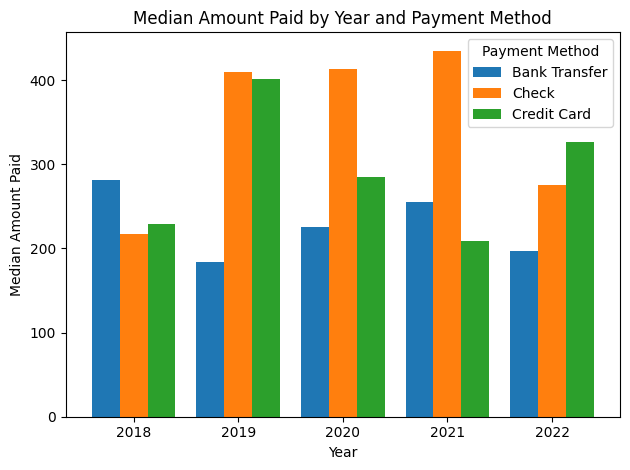

In [53]:
# Visualization
plt.figure(figsize=(10, 6))
median_payments.plot(kind='bar', width=0.8)
plt.title('Median Amount Paid by Year and Payment Method')
plt.xlabel('Year')
plt.ylabel('Median Amount Paid')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.savefig('q4_median_payments.png')
plt.show()